<a href="https://colab.research.google.com/github/harithmote98/harith_INFO5731_Fall2021/blob/main/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

**Reading the training dataset**

In [ ]:
# Write your code here
import pandas as pd
data = open('/content/stsa-train.txt').read()
labels, text = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split(' ')
    labels.append(content[0])
    text.append(" ".join(content[1:]))

**Reading the testing the dataset**

In [ ]:
testing_data = open('/content/stsa-test.txt').read()
test_labels, test_text = [], []
for i, line in enumerate(testing_data.split("\n")):
    content = line.split(' ')
    test_labels.append(content[0])
    test_text.append(" ".join(content[1:]))

**Creating a Dataframe**

In [ ]:
df = pd.DataFrame (list(zip(text, labels)) , columns = ['Raw Text', 'Labels'])
test_df = pd.DataFrame (list(zip(test_text, test_labels)) , columns = ['Raw Text', 'Labels'])
test_df = test_df.dropna()

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

**Data Cleaning**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')
df['Lower Case'] = df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tokenization'] = df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
df['After Lemmatization'] = df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
test_df['Lower Case'] = test_df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['Removal of Punctuation'] = test_df['Lower Case'].str.replace('[^\w\s]','')
test_df['Removal of Special Characters'] = test_df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
test_df['Stopwords Removal'] = test_df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test_df['Tokenization'] = test_df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
test_df['After Lemmatization'] = test_df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

**Data Transformation**

In [ ]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(df['After Lemmatization'])
x_tfidf =  tfidf_vect.transform(df['After Lemmatization'])

In [ ]:
vect_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vect.vocabulary_)
vect_test.fit(test_df['After Lemmatization'])
xtest = vect_test.transform(test_df['After Lemmatization'])
test_y = test_df['Labels']

**Splitting the data into train and test**

In [ ]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, df['Labels'].values,test_size=0.2)

In [ ]:
from sklearn import metrics
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

**Naive Bayes model**

In [ ]:
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(train_x, train_y)
naive_bayes_predictions_validation_data = naive_bayes_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7963898916967509
Precision is 0.7963898916967509
Recall is 0.7963898916967509
F1 is 0.7963898916967508


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score**

In [ ]:
nb_scores_mean = cross_validation_score(naive_bayes_model, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_scores_mean))

Navie Bayes Cross Validation Score is 0.7054947346470649


**Testing metrics**

In [ ]:
naive_bayes_predictions_test_data = naive_bayes_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7941822173435785
Precision is 0.7941822173435785
Recall is 0.7941822173435785
F1 is 0.7941822173435786


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score-Testing**

In [ ]:
nb_test_scores_mean = cross_validation_score(naive_bayes_model, xtest, test_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_test_scores_mean))

Navie Bayes Cross Validation Score is 0.7371044256290158


**Svm model**

In [ ]:
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)
svm_predictions_validation_data = svm_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7891696750902527
Precision is 0.7891696750902527
Recall is 0.7891696750902527
F1 is 0.7891696750902528


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score**

In [ ]:
svm_scores_mean = cross_validation_score(svm_model, valid_x, valid_y)
print('SVM Cross Validation Score is {0}'.format(svm_scores_mean))

SVM Cross Validation Score is 0.6773224898342195


**Testing metrics**

In [ ]:
svm_predictions_test_data = svm_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7952799121844127
Precision is 0.7952799121844127
Recall is 0.7952799121844127
F1 is 0.7952799121844127


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score-Testing**

In [ ]:
svm_test_scores_mean = cross_validation_score(svm_model, xtest, test_y)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

**Knn model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(train_x, train_y)
knn_predictions_valid_data = knn_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7357400722021661
Precision is 0.7357400722021661
Recall is 0.7357400722021661
F1 is 0.7357400722021662


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score**

In [ ]:
knn_scores_mean = cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is {0}'.format(knn_scores_mean))


KNN Cross Validation Score is 0.664993222813054


**Testing metrics**

In [ ]:
knn_predictions_test_data = knn_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7288693743139407
Precision is 0.7288693743139407
Recall is 0.7288693743139407
F1 is 0.7288693743139407


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score-Testing**

In [ ]:
knn_test_scores_mean = cross_validation_score(knn_model, xtest, test_y)
print('KNN Cross Validation Score is {0}'.format(knn_test_scores_mean))

KNN Cross Validation Score is 0.6361376328589443


**Decision tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)
dt_predictions_valid_data = dt_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6671480144404333
Precision is 0.6671480144404333
Recall is 0.6671480144404333
F1 is 0.6671480144404333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score**

In [ ]:
dt_scores_mean = cross_validation_score(dt_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_scores_mean))

Decision Tree Cross Validation Score is 0.6267073297883432


**Testing metrics**

In [ ]:
dt_predictions_test_data = dt_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6591657519209659
Precision is 0.6591657519209659
Recall is 0.6591657519209659
F1 is 0.6591657519209659


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score-Testing**

In [ ]:
dt_test_scores_mean = cross_validation_score(dt_model, xtest, test_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_test_scores_mean))

Decision Tree Cross Validation Score is 0.614144598570828


**Random forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)
rf_predictions_valid_data = rf_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7205776173285199
Precision is 0.7205776173285199
Recall is 0.7205776173285199
F1 is 0.7205776173285199


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score**

In [ ]:
rf_scores_mean = cross_validation_score(rf_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_scores_mean))

Random Forest Cross Validation Score is 0.6692472109269106


**Testing metrics**

In [ ]:
rf_predictions_test_data = rf_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7365532381997805
Precision is 0.7365532381997805
Recall is 0.7365532381997805
F1 is 0.7365532381997805


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross Validation Score-testing**

In [ ]:
rf_test_scores_mean = cross_validation_score(rf_model, xtest, test_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_test_scores_mean))

Random Forest Cross Validation Score is 0.6613703236654056


**Xg Boost Model**

In [ ]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(train_x, train_y)
xg_predictions_valid_data = xg_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(xg_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6469314079422382
Precision is 0.6469314079422382
Recall is 0.6469314079422382
F1 is 0.6469314079422382


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score**

In [ ]:
xg_scores_mean = cross_validation_score(XGBClassifier(), valid_x, valid_y)
print('XG Boost Cross Validation Score is {0}'.format(xg_scores_mean))

XG Boost Cross Validation Score is 0.6209832134292566


**Testing Metrics**

In [ ]:
xg_predictions_test_data = xg_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(xg_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6443468715697036
Precision is 0.6443468715697036
Recall is 0.6443468715697036
F1 is 0.6443468715697036


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**Cross validation score-testing**

In [ ]:
xg_test_scores_mean = cross_validation_score(XGBClassifier(), xtest, test_y)
print('XG Boost Cross Validation Score is {0}'.format(xg_test_scores_mean))

XG Boost Cross Validation Score is 0.6251035849396506


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

**Loading the dataset**

In [ ]:
#Write your code here.
import pandas as pd
data = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
data = data.head(5000)
data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


**dropping nuul values**

In [ ]:
data_after_removing_null_values = data.dropna()

In [ ]:
data_after_removing_null_values.shape

(3422, 6)

**Visualizing ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


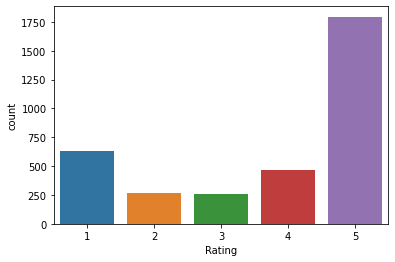

In [ ]:
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

**classifying ratings as positive and negative**

In [ ]:
def review_classification(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

rating_classification = data_after_removing_null_values['Rating'].map(review_classification) 
data_after_removing_null_values['Rating'] = rating_classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data_after_removing_null_values['Rating'].value_counts()

positive    2522
negative     900
Name: Rating, dtype: int64

**Visualizing ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


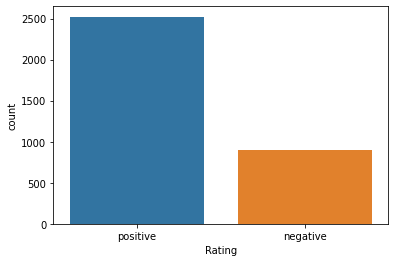

In [ ]:
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

**Data Cleaning**

In [ ]:
import re
i=0;
for sent in data_after_removing_null_values['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [ ]:
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

**Transforming to Lower Case, Removing HTML Content, Removing Special Characters**

In [ ]:
import re
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: cleanhtml(x))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

**Removing stop words**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**K-means using Bag of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data_after_removing_null_values['Cleaned Text'].values)

In [ ]:
column_names = count_vect.get_feature_names()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
labels = model.labels_
cluster_center = model.cluster_centers_
cluster_center

array([[2.05479452e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.84931507e-03],
       [2.63059000e-03, 0.00000000e+00, 7.51597144e-04, ...,
        1.50319429e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.35392908766809134

In [ ]:
df = data_after_removing_null_values
df['Bow Clus Label'] = model.labels_
df.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bow Clus Label
0     146
1    2661
2       1
3      36
4      21
5     548
6       2
7       3
8       2
9       2
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 good
 screen
 use
 great
 one
 like
 battery
 really
 sim
Cluster 1: phone
 great
 good
 screen
 works
 price
 work
 like
 one
 love
Cluster 2: idol
 sound
 light
 like
 screen
 bass
 even
 5s
 version
 day
Cluster 3: phone
 screen
 good
 camera
 like
 battery
 one
 use
 idol
 great
Cluster 4: phone
 screen
 one
 like
 good
 camera
 would
 use
 phones
 get
Cluster 5: phone
 screen
 great
 good
 one
 would
 like
 price
 get
 battery
Cluster 6: phone
 camera
 tracfone
 idol
 data
 one
 use
 screen
 like
 time
Cluster 7: carrier
 iphone
 phone
 purchase
 compatible
 card
 unlocked
 sim
 provider
 purchased
Cluster 8: phone
 like
 good
 quality
 one
 camera
 really
 moto
 phones
 screen
Cluster 9: phone
 camera
 like
 great
 screen
 really
 price
 app
 use
 better


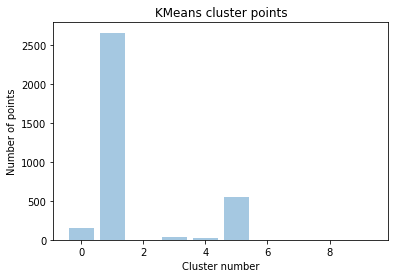

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

**k means using average words to vectors**

In [ ]:
list_of_sentences = []
for sentence in data_after_removing_null_values['Cleaned Text'].values:
    list_of_sentences.append(sentence.split())

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)

In [ ]:
import numpy as np
sent_vectors = []
for sent in list_of_sentences:
  sent_vec = np.zeros(100)
  cnt_words = 0
  for word in sent:
    try:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
    except:
      pass
  sent_vec /= cnt_words
  sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(3422, 100)

In [ ]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

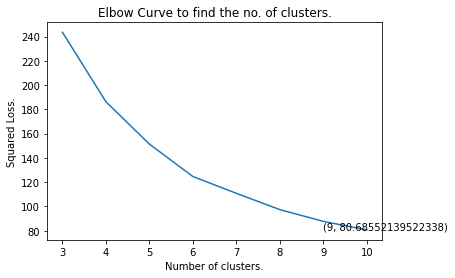

In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [ ]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  80.68552139522338


In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_cluster_pred = model2.predict(sent_vectors)
word_cluster_pred_2 = model2.labels_
word_cluster_center = model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.30641859, -0.46872414, -0.21061943,  0.14982313, -0.0828823 ,
         0.01366496,  0.21741956, -0.23398761,  0.02282188,  0.04378496,
         0.19597684,  0.08273085, -0.46748296,  0.11212494,  0.25092936,
        -0.03335609,  0.21486658,  0.16675034,  0.11286986,  0.32454698,
        -0.01182445,  0.04899471,  0.00389607,  0.31838477, -0.1290493 ,
         0.3595406 ,  0.17459007, -0.12071728,  0.36988876, -0.1355816 ,
         0.07624888,  0.06377901, -0.04242995,  0.31236737, -0.12176705,
        -0.30352286,  0.06177772, -0.16552021,  0.08502804,  0.08344244,
         0.1823257 , -0.07472978, -0.13146159,  0.08572587,  0.09703465,
        -0.10280098, -0.22189743, -0.52459037,  0.26624204, -0.06141979,
        -0.2007115 , -0.06493657,  0.16907986, -0.21787786,  0.01892212,
         0.06657759,  0.24907025, -0.18912404, -0.03519829,  0.31973861,
        -0.08027432,  0.00874021, -0.05805095,  0.31267066, -0.01659878,
         0.13745657,  0.34290554,  0.07698584,  0.0

In [ ]:
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
I purchased this phone in December as a christmas present to my son. I called sprint to activate the phone only to find out the ESN wasn't clear. I was told to come into the store and upon research the phone wasn't clear. I reached out to this company to inform them that this ESN wasn't clean. I was told to send the phone back and they would send out another phone. I asked the representative to provide me with the ESN # so that I could call and make sure it was clear. I was told that they didn't have to phone available and was guaranteed it would be clear. I should've known something was wrong then. I received a second phone that turned out not have a clear ESN. The representative at Sprint informed me that the seller of these phones are aware the the ESN isn't clear. So once again I had to send another phone back. I asked for a refund for the phone and shipping since the sent me t

**DBscan clustering**

In [ ]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [ ]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

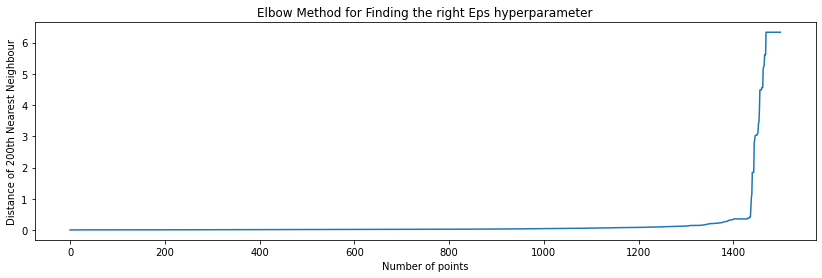

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [ ]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


**Hierarichal Clustering**

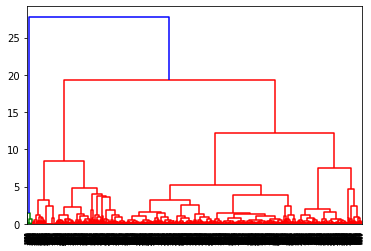

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     665
1    1741
2     718
3      61
4     237
Name: Reviews, dtype: int64

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(hcdf.iloc[hcdf.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hcdf.iloc[hcdf.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android p

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
In hierarcical clustering you first run the algorithm then looking at the dendogram we decide the number of clusters but in K-means clustering it is vice-versa.
We first check for the number of clusters using scree plot or elbow curve then run the algorithm.In DBSCAN it is not required to specify the number of clusters.
Using K Means we can easily classify the clusters into groups and also we can find the optimum number of clusters and train the KMeans model using the optimum
number of clusters which gives us best model to classify the Reviews.Second best model is Hierarchical clustering, but it will be very difficult to classify 
the clusters using Hierarchical clustering. DBScan classifed all the reviews into single cluster which is not best fit.
